IMPORT LIBRARIRES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px



In [3]:
house_data=pd.read_csv(r"C:\Users\jayat\OneDrive\Documents\Downloads\Housing - Housing.csv.csv")

In [4]:
house_data.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
182,5145000,3410,3,1,2,no,no,no,no,yes,0,no,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
362,3710000,4050,2,1,1,yes,no,no,no,no,0,no,furnished
494,2730000,6800,2,1,1,yes,no,no,no,no,0,no,unfurnished
240,4585000,3840,3,1,2,yes,no,no,no,no,1,yes,semi-furnished
45,7560000,6000,3,2,3,yes,no,no,no,yes,0,no,semi-furnished
216,4830000,6040,3,1,1,yes,no,no,no,no,2,yes,semi-furnished
383,3570000,4500,4,2,2,yes,no,yes,no,no,2,no,furnished
495,2730000,4000,3,1,2,yes,no,no,no,no,1,no,unfurnished
324,4007500,4500,3,1,2,no,no,yes,no,yes,0,no,semi-furnished


In [5]:
house_data.shape

(545, 13)

In [6]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
house_data.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [8]:
print("Missing rows:", house_data.isnull().sum().sum())
print("Duplicate rows:", house_data.duplicated().sum())

Missing rows: 0
Duplicate rows: 0


In [9]:
house_data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
#binary categorical data
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    house_data[col]=house_data[col].astype(str).str.strip().str.lower()
    house_data[col]=house_data[col].map({'yes': 1, 'no': 0}).astype('category')

In [11]:
#ordinal encoding
house_data['furnishingstatus'] = house_data['furnishingstatus'].astype(str).str.strip().str.lower()
house_data['furnishingstatus'] = house_data['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}).astype('category')

In [13]:
house_data['basement']

0      0
1      0
2      1
3      1
4      1
      ..
540    1
541    0
542    0
543    0
544    0
Name: basement, Length: 545, dtype: category
Categories (2, int64): [0, 1]

In [14]:
house_data.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object

In [15]:
house_data.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1
88,6475000,7410,3,1,1,1,1,1,0,1,2,1,0
497,2660000,3934,2,1,1,1,0,0,0,0,0,0,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1
250,4515000,3510,3,1,3,1,0,0,0,0,0,0,1
372,3640000,3180,3,1,2,0,0,1,0,0,0,0,1
76,6650000,6420,3,2,3,1,0,0,0,1,0,1,2
185,5110000,3000,3,1,2,1,0,1,0,0,0,0,0
340,3850000,5300,5,2,2,1,0,0,0,0,0,0,1


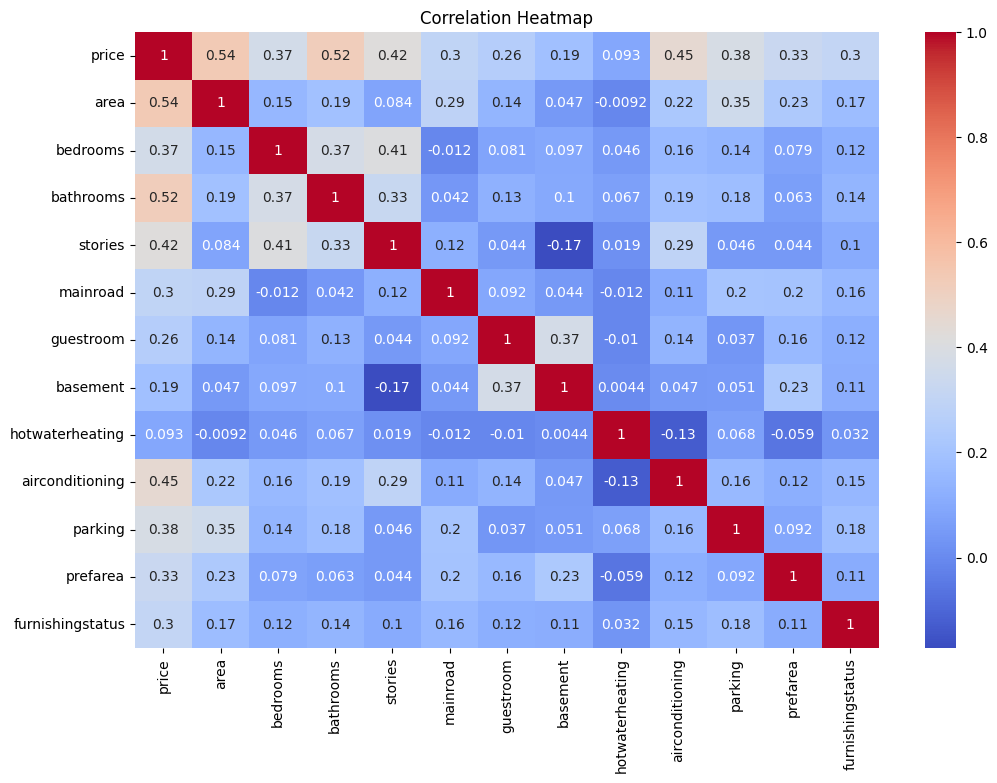

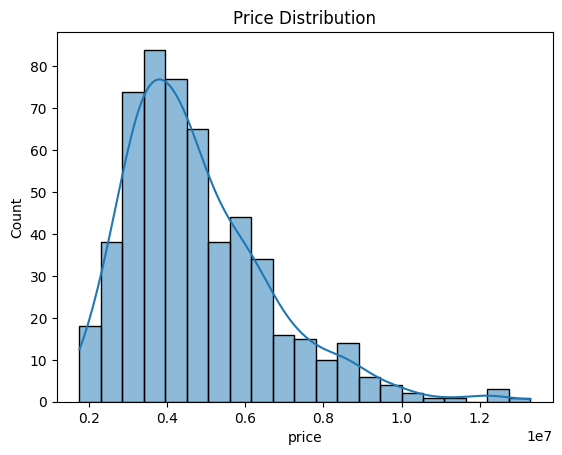

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(house_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.histplot(house_data['price'], kde=True)
plt.title("Price Distribution")
plt.show()

<Axes: ylabel='Density'>

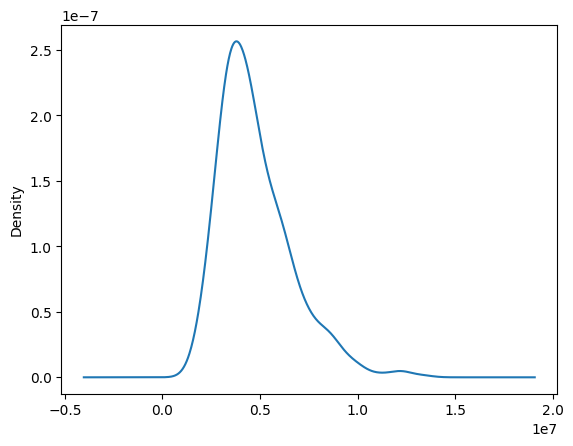

In [26]:
house_data['price'].plot.kde()

In [27]:
num_pipeline = Pipeline([
    ('transform', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scale', StandardScaler())
])

outlier_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p)),
    ('scale', StandardScaler())
])

price


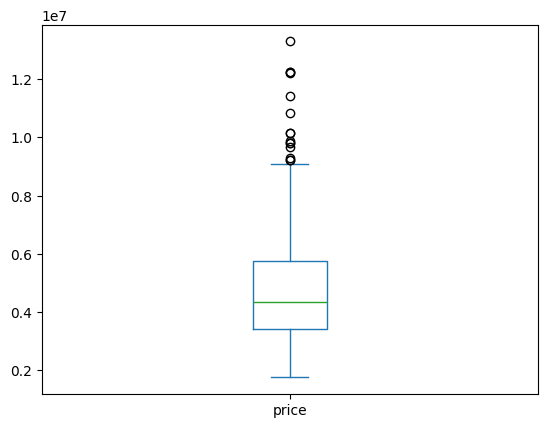

area


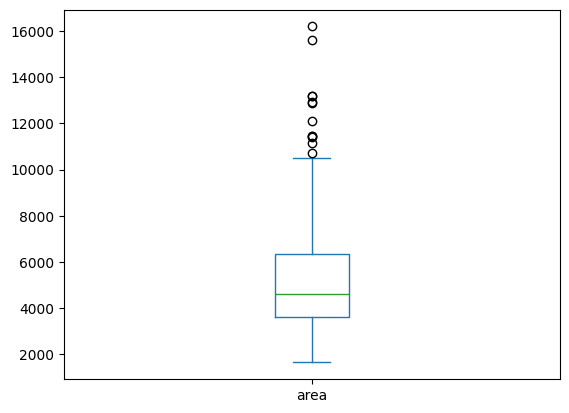

bedrooms


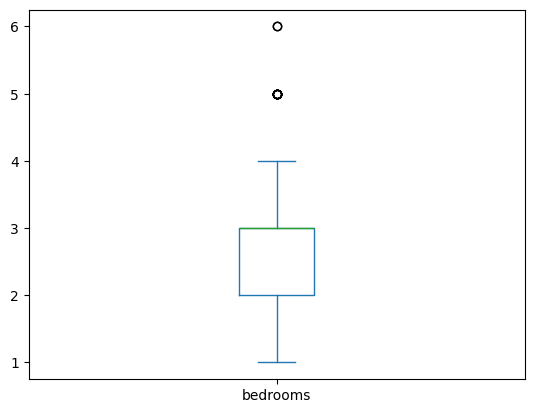

bathrooms


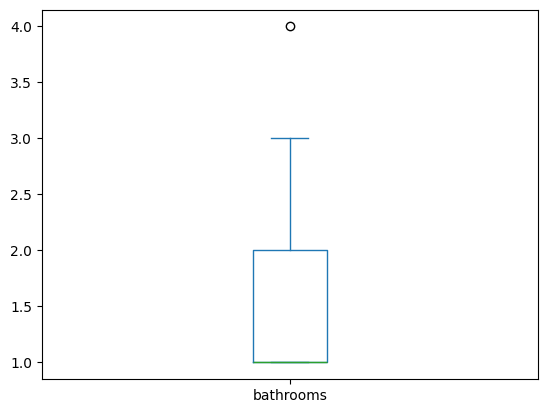

stories


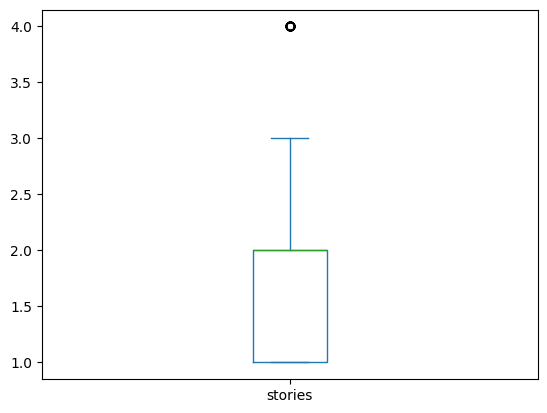

parking


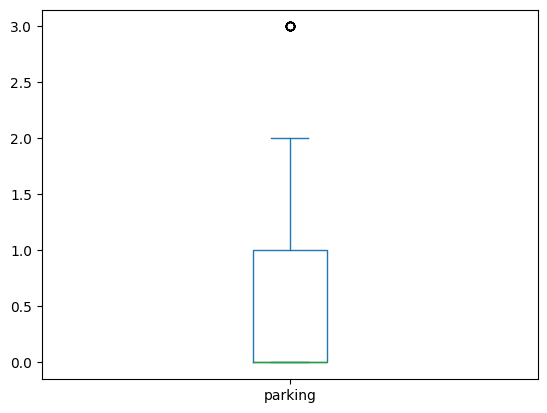

In [28]:
num_cols = list(house_data.dtypes[(house_data.dtypes == 'int64') | (house_data.dtypes == 'float64')].index)

for col in num_cols:
    print(col)
    house_data[col].plot.box()
    plt.show()

In [30]:

X = house_data.drop("price", axis=1)
y = house_data["price"]

# Step 10: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Feature Scaling (including target)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [33]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

alphas = np.logspace(-4, 4, 50)  # from 1e-4 to 1e4

lasso = LassoCV(alphas = alphas)
lasso.fit(X_train_scaled, y_train)

rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf_grid = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, random_state=42, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
rf = rf_grid.best_estimator_

dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = RandomizedSearchCV(DecisionTreeRegressor(max_features=1.0,random_state=42), dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
dt_grid.fit(X_train_scaled, y_train)
dt_reg = dt_grid.best_estimator_

param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gbr_grid = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
gbr_grid.fit(X_train_scaled, y_train)
gbr = gbr_grid.best_estimator_

svr_params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.01, 0.1, 1]
}
svr_grid = RandomizedSearchCV(SVR(), svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
svr_grid.fit(X_train_scaled, y_train)
svr = svr_grid.best_estimator_

In [35]:
scoring = 'r2'

models = {
    'Linear Regression': lr,
    'Lasso Regression': lasso,
    'Decision Tree Regression': dt_reg,
    'Gradient Boosting Regression': gbr,
    'Random Forest Regressor': rf,
    'SVR': svr
}

kf = KFold(n_splits=10,shuffle=True,random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=scoring, n_jobs=-1)
    print(f"{name}: CV R2 = {np.mean(scores):.4f}")

Linear Regression: CV R2 = 0.6501
Lasso Regression: CV R2 = 0.6503
Decision Tree Regression: CV R2 = 0.5249
Gradient Boosting Regression: CV R2 = 0.6334
Random Forest Regressor: CV R2 = 0.6582
SVR: CV R2 = -0.0789
